In [33]:
import statistics
import numpy as np
from PIL import Image
import cv2
import pandas as pd
labeled_dir = str("/home/eric/Documents/cervicalResearchIIP/img_1006t/labeled")
# Dicecの計算
def cal_DiceMulitple(dir, input_name):
    # change the label count as your preference
    Dice = [0] * 11
    Count1 = [0] * 11 #予測結果の各ラベルの要素数
    Count2 = [0] * 11 #ラベル画像の
    Count3 = [0] * 11 #正解した画素数
    
    for index in range(len(input_name)):
        print('index = ', index)

        img1 = cv2.imread(dir + '/' + input_name[index] + ".png", cv2.IMREAD_GRAYSCALE)
        img2 = cv2.imread(labeled_dir + '/' + input_name[index] + ".png", cv2.IMREAD_GRAYSCALE)
        #_, img2 = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY)
        print("予測画像:", dir  + '/' + input_name[index] + ".png")
        print("テストラベル:", labeled_dir + '/' + input_name[index] + ".png")
        unique_label1 = np.unique(img1)
        unique_label2 = np.unique(img2)
        # print(unique_label1)
        # print(unique_label2)
        # change the image array size to your need
        for n in range(256):
            for l in range(256):
                value1 = img1[n,l]
                # for index, uq_value in enumerate(unique_label1):
                #     if(value1 == uq_value):
                #         value1 = index

                Count1[value1] += 1

                value2 = img2[n,l]
                Count2[value2] += 1                    

                if(value1 == value2):
                    Count3[value1] += 1 
    for i in range(11):
        if(Count1[i]+Count2[i] != 0):
            Dice[i] = (2*Count3[i])/(Count1[i] + Count2[i])
        if(Count1[i]+Count2[i] == 0):
            print("")
            #print("4 label case:" + str(input_name[index]))
    Dice.append(statistics.mean(Dice[1:]))
    print('Count1 = ', Count1)
    print('Count2 = ', Count2)
    print('Count3 = ', Count3)
    print('Dice = ', Dice)
    #print(unique_label)

    return Dice


In [34]:
import os
# ファイル名の先頭部分（prefix）により自動的にファイル名を抽出するアルゴリズム。

""" 

Extracts filenames in directory if they start with the prefix input 


Args/Parameters:

    directory_path (string): The path of the dir (ex: /root/home/Documents/etc)
    
    prefix (string): Prefix of the file name (ex: 'Bo' is a prefix of 'Bone')

Returns:

    sorted_file_names (list of str): File names sorted in ascending order in the dir without extension ex: ['bone1', 'bone2', ...]

Raises:

    SomeError: ...

"""

def file_names_with_prefix(directory_path, prefix):

    # Initialize an empty list to store the file names without extensions
    file_names_without_extension = []

    # Loop through all files in the specified directory
    for filename in os.listdir(directory_path):
        #Checking if the file in loop exists in the directory_path not sure how is this necessary
        #??
        if os.path.isfile(os.path.join(directory_path, filename)):
            # Check if the file name starts with the specified prefix
            if filename.startswith(prefix):
                # Get the file name without extension
                name_without_extension, _ = os.path.splitext(filename)

                # Append the file name (without extension) to the list
                file_names_without_extension.append(name_without_extension)

    # Sort the list of file names without extensions in ascending order
    sorted_file_names = sorted(
        file_names_without_extension,
        key=lambda x: (x.split('-')[0], int(x.split('-')[1]))
    )  # Modify this part based on your file naming convention

    # Now you have a sorted list of file names with the specified prefix and without extensions
    return sorted_file_names


In [35]:

#searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/1-20250206-Unet-CRF-HP/fold1/crf")
#searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/2-20250205-MCunet-CRF-HP/fold1/crf")
#searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/3-20250208-TransUnet-CRF-HP/fold1/crf")

#unet
searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108")
#mcunet
searchdir2 = str("/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended (x2, x4)")
print(searchdir)


/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108


index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N1-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-1.png
image: N1-1 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N1-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-2.png
image: N1-2 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N1-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-3.png
Count1 =  [59508, 868, 586, 630, 513, 571, 516, 620, 467, 763, 494]
Count2 =  [59442, 948, 600, 560, 499, 560, 491, 692, 446, 797, 501]
Count3 =  [59085, 847, 542, 548, 487, 529, 465, 567, 407, 709, 475]
Dice =  [0.9934426229508196, 0.9328193832599119, 0.9139966273187183, 0.9210084033613445, 0.9624505928853755, 0.9354553492484527, 0.9235352532274081, 0.864329268292683, 0.891566265060241, 0

[ WARN:0@551.137] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N1-1.png'): can't open/read file: check file path/integrity
[ WARN:0@551.137] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended (x2, x4)/fold2/crf/N1-1.png'): can't open/read file: check file path/integrity
[ WARN:0@551.137] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N1-1.png'): can't open/read file: check file path/integrity
[ WARN:0@551.138] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N1-2.png'): can't open/read file: check file path/integrity
[ WARN:0@551.138] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended 

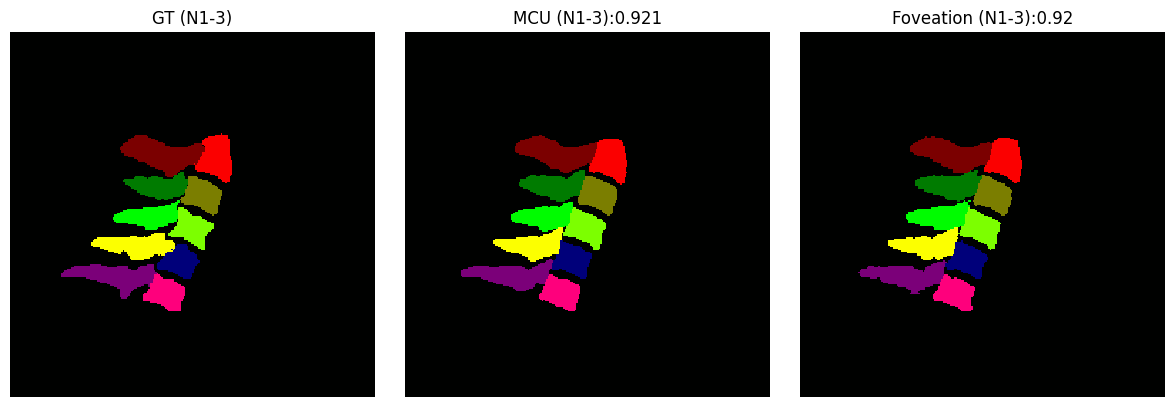

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N1-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-4.png
image: N1-4 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N1-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-5.png
image: N1-5 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N1-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-6.png
image: N1-6 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N1-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-7.png
image: N1-7 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N1-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP

[ WARN:0@551.318] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N1-4.png'): can't open/read file: check file path/integrity
[ WARN:0@551.318] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended (x2, x4)/fold2/crf/N1-4.png'): can't open/read file: check file path/integrity
[ WARN:0@551.318] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N1-4.png'): can't open/read file: check file path/integrity
[ WARN:0@551.320] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N1-5.png'): can't open/read file: check file path/integrity
[ WARN:0@551.320] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended 

Count1 =  [58491, 1007, 774, 732, 639, 665, 602, 703, 560, 823, 540]
Count2 =  [58497, 1034, 833, 697, 677, 624, 599, 682, 602, 765, 526]
Count3 =  [58011, 947, 712, 651, 604, 603, 570, 643, 538, 735, 483]
Dice =  [0.9917427428454201, 0.9279764821166095, 0.8861232109520847, 0.9111266620013996, 0.9179331306990881, 0.9356089992242048, 0.9492089925062448, 0.9285198555956679, 0.9259896729776248, 0.9256926952141058, 0.9061913696060038, 0.9214371070893034]
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended (x2, x4)/fold2/crf/N1-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-8.png
Count1 =  [58412, 1124, 807, 709, 630, 698, 593, 716, 537, 775, 535]
Count2 =  [58497, 1034, 833, 697, 677, 624, 599, 682, 602, 765, 526]
Count3 =  [57960, 989, 718, 630, 609, 608, 557, 660, 525, 698, 492]
Dice =  [0.9915404288805824, 0.9165894346617238, 0.875609756097561, 0.8961593172119487, 0.9319051262433052, 0.9198184568835098, 0.9345

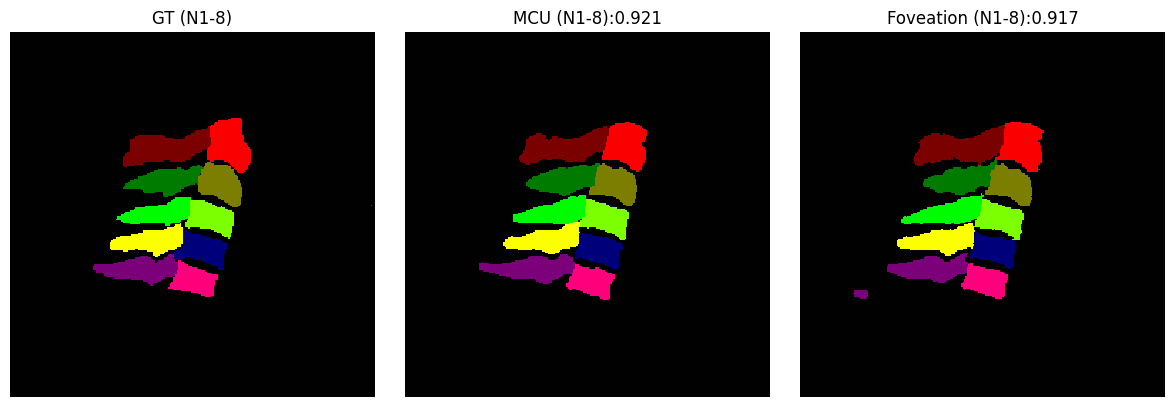

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N1-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-9.png
Count1 =  [57970, 1243, 674, 919, 528, 805, 523, 864, 465, 1088, 457]
Count2 =  [57738, 1169, 762, 1020, 503, 866, 528, 939, 464, 1118, 429]
Count3 =  [57307, 1132, 669, 884, 489, 778, 507, 810, 441, 962, 395]
Dice =  [0.990545165416393, 0.9386401326699834, 0.9317548746518106, 0.9118102114492006, 0.9485935984481086, 0.931178934769599, 0.9647954329210275, 0.8985024958402662, 0.9494079655543596, 0.8721668177697189, 0.891647855530474, 0.9238498319604549]
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended (x2, x4)/fold2/crf/N1-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-9.png
Count1 =  [57971, 1290, 695, 872, 515, 831, 531, 848, 483, 1043, 457]
Count2 =  [57738, 1169, 762, 1020, 503, 866, 528, 939, 464, 1118, 429]
Count3 =  

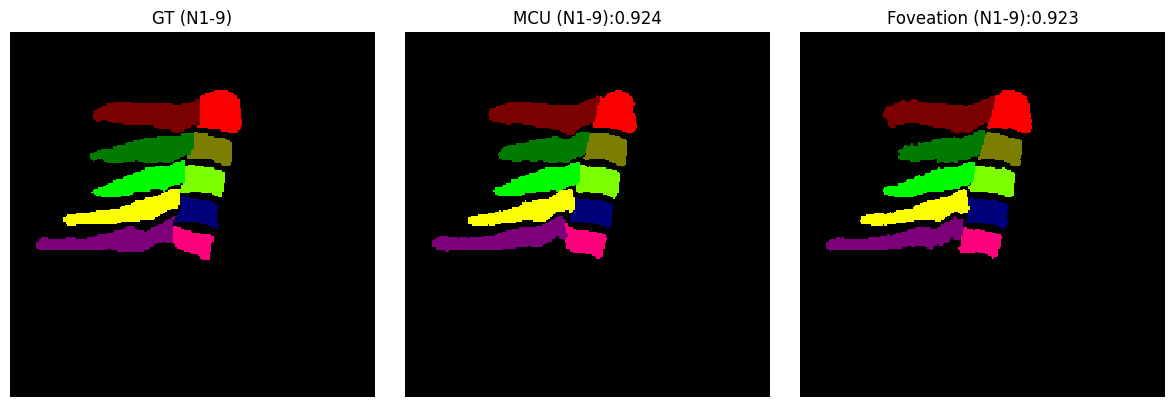

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N1-10.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-10.png
image: N1-10 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N2-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-1.png
image: N2-1 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N2-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-2.png
image: N2-2 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N2-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-3.png
image: N2-3 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N2-4.png
テストラベル: /home/eric/Documents/cervicalResearch

[ WARN:0@551.752] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N1-10.png'): can't open/read file: check file path/integrity
[ WARN:0@551.752] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended (x2, x4)/fold2/crf/N1-10.png'): can't open/read file: check file path/integrity
[ WARN:0@551.752] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N1-10.png'): can't open/read file: check file path/integrity
[ WARN:0@551.754] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N2-1.png'): can't open/read file: check file path/integrity
[ WARN:0@551.754] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extend

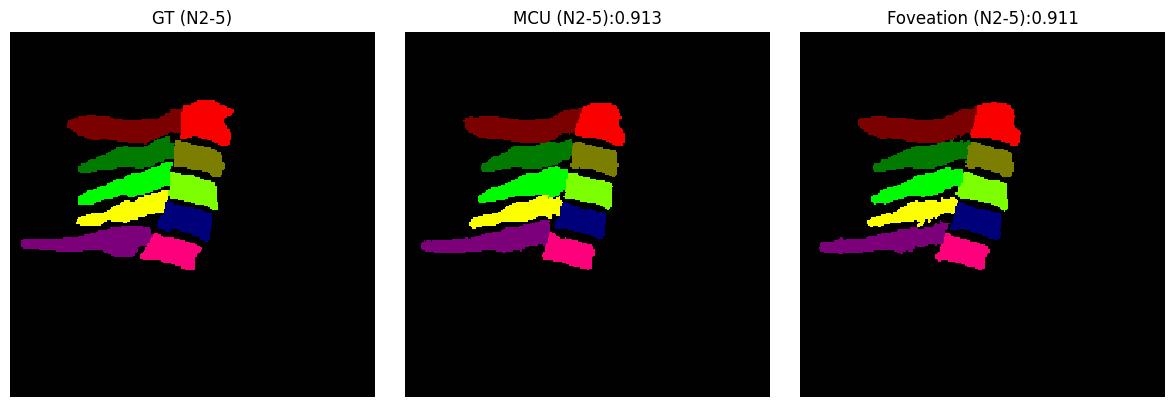

[ WARN:0@551.944] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N2-6.png'): can't open/read file: check file path/integrity
[ WARN:0@551.944] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended (x2, x4)/fold2/crf/N2-6.png'): can't open/read file: check file path/integrity
[ WARN:0@551.945] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N2-6.png'): can't open/read file: check file path/integrity
[ WARN:0@551.946] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N2-7.png'): can't open/read file: check file path/integrity
[ WARN:0@551.946] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended 

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N2-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-6.png
image: N2-6 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N2-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-7.png
image: N2-7 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N2-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-8.png
image: N2-8 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N2-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-9.png
image: N2-9 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N2-10.png
テストラベル: /home/eric/Documents/cervicalResearchII

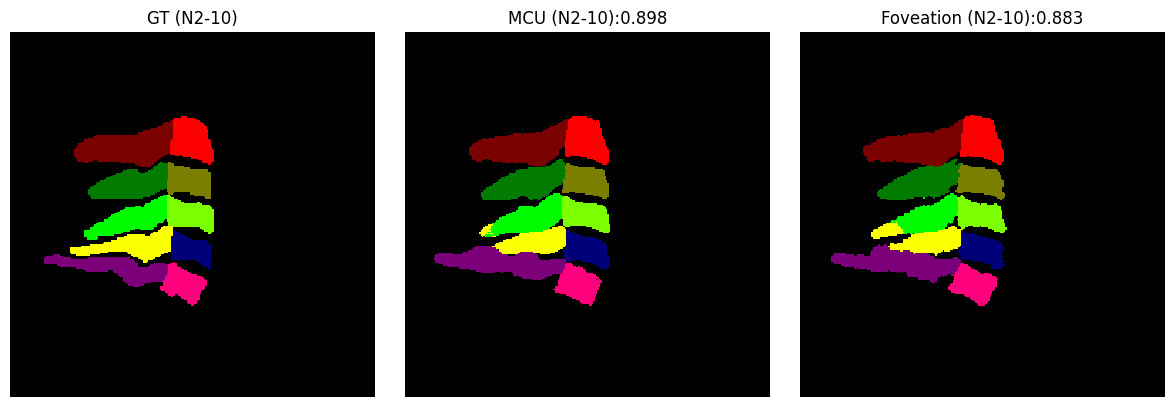

[ WARN:0@552.133] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N3-1.png'): can't open/read file: check file path/integrity
[ WARN:0@552.133] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended (x2, x4)/fold2/crf/N3-1.png'): can't open/read file: check file path/integrity
[ WARN:0@552.133] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N3-1.png'): can't open/read file: check file path/integrity
[ WARN:0@552.134] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N3-2.png'): can't open/read file: check file path/integrity
[ WARN:0@552.134] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended 

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N3-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-1.png
image: N3-1 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N3-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-2.png
image: N3-2 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N3-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-3.png
image: N3-3 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N3-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-4.png
image: N3-4 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N3-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP

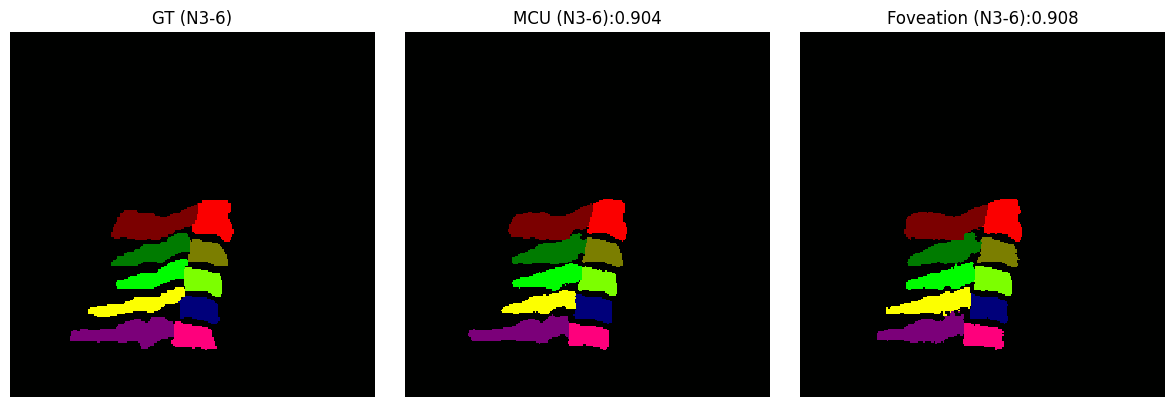

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N3-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-7.png
Count1 =  [58199, 1024, 703, 733, 503, 751, 534, 852, 520, 1151, 566]
Count2 =  [58383, 1100, 666, 649, 465, 704, 474, 874, 517, 1162, 542]
Count3 =  [57850, 988, 647, 611, 449, 672, 460, 799, 495, 1021, 523]
Dice =  [0.9924345096155496, 0.9303201506591338, 0.9452154857560263, 0.8842257597684515, 0.9276859504132231, 0.9237113402061856, 0.9126984126984127, 0.9258400926998841, 0.9546769527483124, 0.8828361435365326, 0.944043321299639, 0.9231253609785801]
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended (x2, x4)/fold2/crf/N3-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-7.png
Count1 =  [58214, 1026, 712, 734, 516, 752, 511, 834, 516, 1162, 559]
Count2 =  [58383, 1100, 666, 649, 465, 704, 474, 874, 517, 1162, 542]
Count3 =  

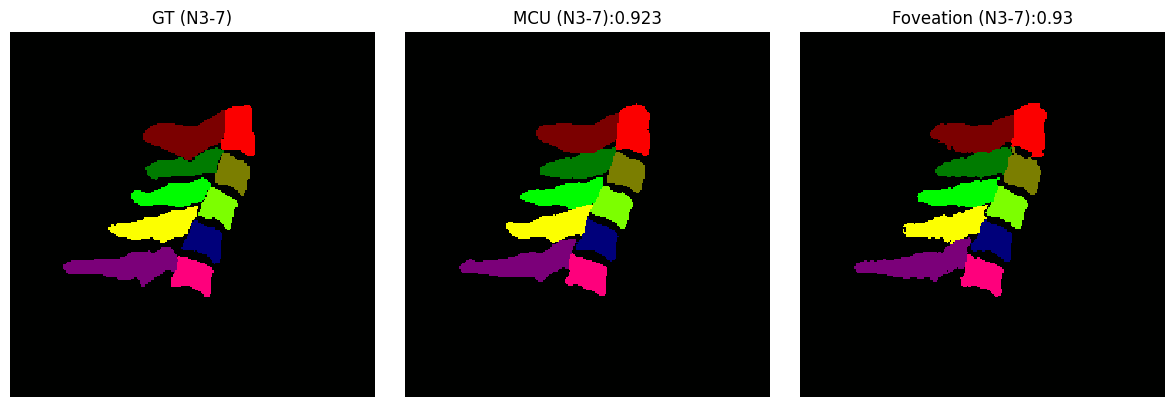

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N3-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-8.png
image: N3-8 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N3-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-9.png
image: N3-9 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N3-10.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-10.png
Count1 =  [58587, 1219, 676, 784, 549, 778, 481, 645, 427, 907, 483]
Count2 =  [57779, 1470, 731, 900, 600, 810, 645, 781, 406, 924, 490]
Count3 =  [57513, 1218, 639, 744, 529, 701, 481, 635, 385, 788, 434]
Dice =  [0.9884846089063816, 0.9059129788025289, 0.908315565031983, 0.8836104513064132, 0.9208006962576153, 0.8828715365239295, 0.8543516873889876, 0.8906030855539971, 0.9243697478991

[ WARN:0@552.509] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N3-8.png'): can't open/read file: check file path/integrity
[ WARN:0@552.509] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended (x2, x4)/fold2/crf/N3-8.png'): can't open/read file: check file path/integrity
[ WARN:0@552.509] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N3-8.png'): can't open/read file: check file path/integrity
[ WARN:0@552.511] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N3-9.png'): can't open/read file: check file path/integrity
[ WARN:0@552.511] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended 

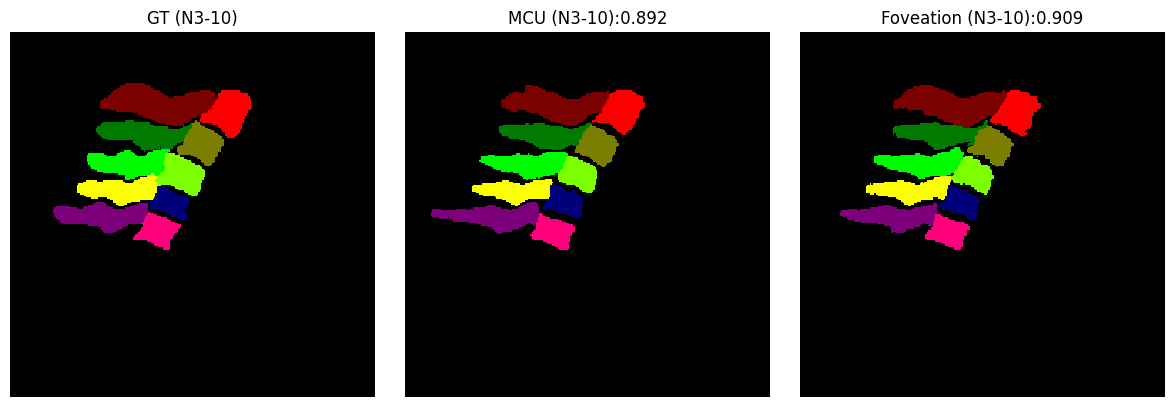

[ WARN:0@552.695] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N4-1.png'): can't open/read file: check file path/integrity
[ WARN:0@552.695] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended (x2, x4)/fold2/crf/N4-1.png'): can't open/read file: check file path/integrity
[ WARN:0@552.695] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N4-1.png'): can't open/read file: check file path/integrity
[ WARN:0@552.696] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N4-2.png'): can't open/read file: check file path/integrity
[ WARN:0@552.696] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended 

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N4-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-1.png
image: N4-1 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N4-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-2.png
image: N4-2 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N4-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-3.png
image: N4-3 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N4-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-4.png
Count1 =  [57743, 1269, 808, 786, 629, 871, 623, 727, 602, 875, 603]
Count2 =  [57438, 1260, 932, 804, 630, 877, 634, 745, 635, 966, 615]
Count3 =  [57049, 1186, 751, 729, 583, 820, 

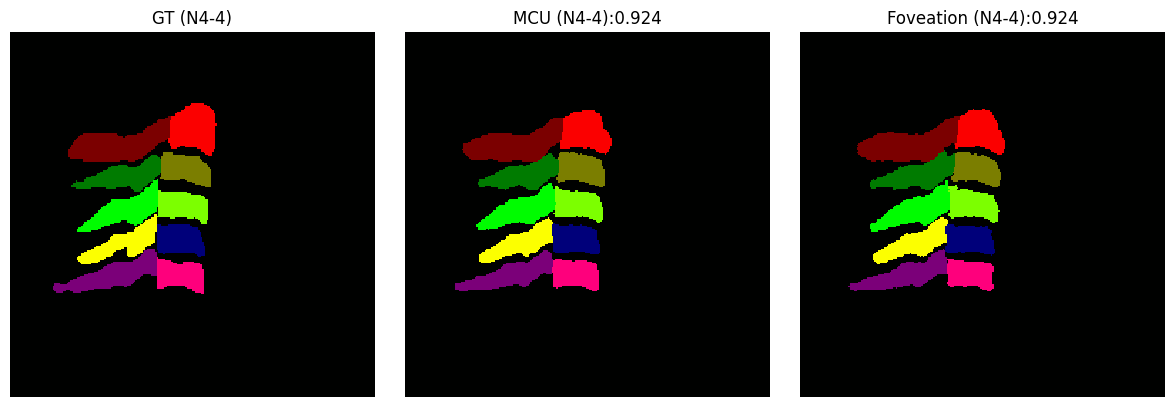

[ WARN:0@552.895] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N4-5.png'): can't open/read file: check file path/integrity


index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N4-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-5.png
image: N4-5 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N4-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-6.png
image: N4-6 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N4-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-7.png
Count1 =  [58231, 1080, 577, 842, 498, 718, 507, 759, 542, 916, 866]
Count2 =  [58576, 1130, 638, 767, 553, 705, 551, 680, 538, 816, 582]
Count3 =  [57777, 1043, 568, 714, 483, 651, 491, 650, 504, 794, 542]
Dice =  [0.98927290316505, 0.9438914027149321, 0.9349794238683128, 0.8875077688004972, 0.9191246431969553, 0.9149683766690091, 0.9281663516068053, 0.9034051424600417, 0.9333333333333333

[ WARN:0@552.895] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended (x2, x4)/fold2/crf/N4-5.png'): can't open/read file: check file path/integrity
[ WARN:0@552.895] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N4-5.png'): can't open/read file: check file path/integrity
[ WARN:0@552.897] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N4-6.png'): can't open/read file: check file path/integrity
[ WARN:0@552.897] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended (x2, x4)/fold2/crf/N4-6.png'): can't open/read file: check file path/integrity
[ WARN:0@552.897] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MC

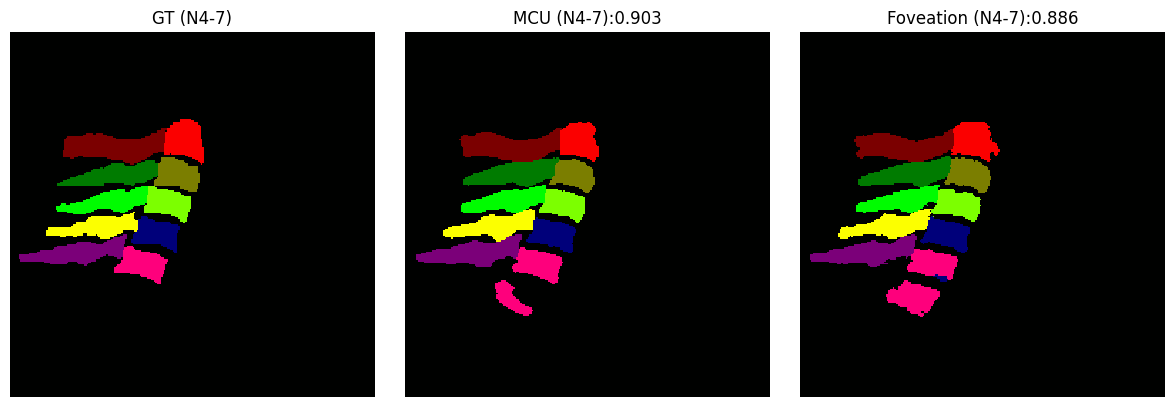

[ WARN:0@553.083] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N4-8.png'): can't open/read file: check file path/integrity
[ WARN:0@553.083] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended (x2, x4)/fold2/crf/N4-8.png'): can't open/read file: check file path/integrity
[ WARN:0@553.083] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N4-8.png'): can't open/read file: check file path/integrity
[ WARN:0@553.084] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N4-9.png'): can't open/read file: check file path/integrity
[ WARN:0@553.084] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended 

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N4-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-8.png
image: N4-8 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N4-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-9.png
image: N4-9 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N4-10.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-10.png
image: N4-10 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N5-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-1.png
image: N5-1 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N5-2.png
テストラベル: /home/eric/Documents/cervicalResearch

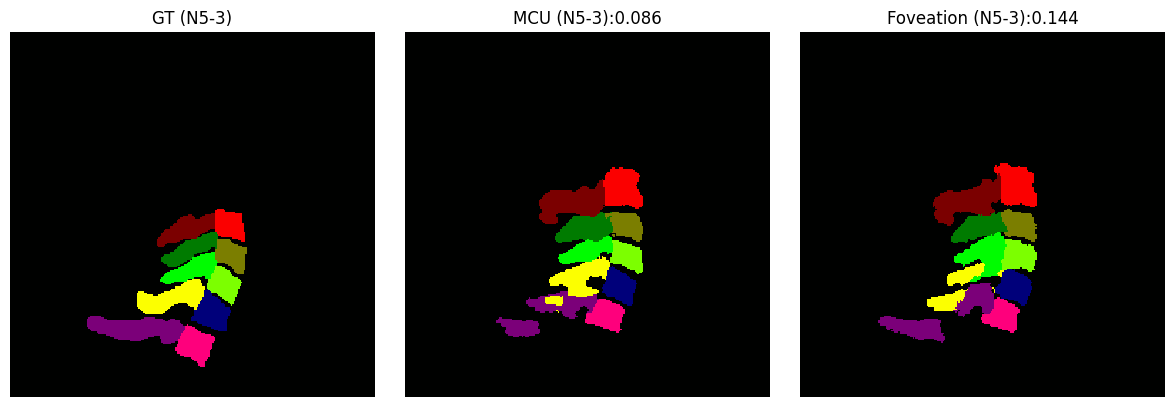

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N5-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-4.png
image: N5-4 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N5-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-5.png
image: N5-5 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N5-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-6.png
image: N5-6 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N5-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-7.png
image: N5-7 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N5-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP

[ WARN:0@553.270] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N5-4.png'): can't open/read file: check file path/integrity
[ WARN:0@553.270] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended (x2, x4)/fold2/crf/N5-4.png'): can't open/read file: check file path/integrity
[ WARN:0@553.271] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N5-4.png'): can't open/read file: check file path/integrity
[ WARN:0@553.272] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold2/crf/N5-5.png'): can't open/read file: check file path/integrity
[ WARN:0@553.272] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended 

In [36]:

fold = "fold2"
imgs_name = []
for i in range(5):
    for j in range (10):
        imgs_name.append(f"N{i+1}-{j+1}")

searchdir =  searchdir + "/" + fold + "/crf"
searchdir2 = searchdir2 + "/"  + fold + "/crf"
    

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
for img_name in imgs_name:
    try:
        img_label = cv2.imread(labeled_dir + "/" + img_name + ".png", cv2.IMREAD_GRAYSCALE) 
        img = cv2.imread(searchdir + "/" + img_name + ".png", cv2.IMREAD_GRAYSCALE)
        img2 = cv2.imread(searchdir2 + "/" + img_name + ".png", cv2.IMREAD_GRAYSCALE)
        
        
        Dice1 = cal_DiceMulitple(searchdir, [img_name])
        df = pd.DataFrame(Dice1)
        df = df.T

        Dice2 = cal_DiceMulitple(searchdir2, [img_name])
        df = pd.DataFrame(Dice2)
        df = df.T
        
        
        

        fig, axes = plt.subplots(1, 3, figsize=(12, 4)) # figsize=(width, height) in inches
        colors = ['#000100', '#7B0000', '#FB0000', '#007B00', '#7B7E00', '#00FC00', '#7CFF00', '#FCFF00', '#00007A', '#7B0079', '#FE007C']
        cmap = ListedColormap(colors[:11])
        
        # 1. Plot the first image
        axes[0].imshow(img_label, cmap=cmap, vmin=0, vmax=10, interpolation='nearest')
        axes[0].set_title(f'GT ({img_name})') # Caption for the first plot
        axes[0].axis('off') # Hide axis

        # 2. Plot the first image
        axes[1].imshow(img, cmap=cmap, vmin=0, vmax=10, interpolation='nearest')
        axes[1].set_title(f'MCU ({img_name}):{np.round(Dice1[-1], 3)}') # Caption for the first plot
        axes[1].axis('off') # Hide axis

        # 3. Plot the second image
        axes[2].imshow(img2, cmap=cmap, vmin=0, vmax=10, interpolation='nearest')
        axes[2].set_title(f'Foveation ({img_name}):{np.round(Dice2[-1], 3)}') # Caption for the second plot
        axes[2].axis('off') # Hide axis

        # 5. Adjust layout to prevent titles from overlapping and display the plot
        plt.tight_layout()
        plt.show()
    except:
        print(f"image: {img_name} not found")